### Load Necessary Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

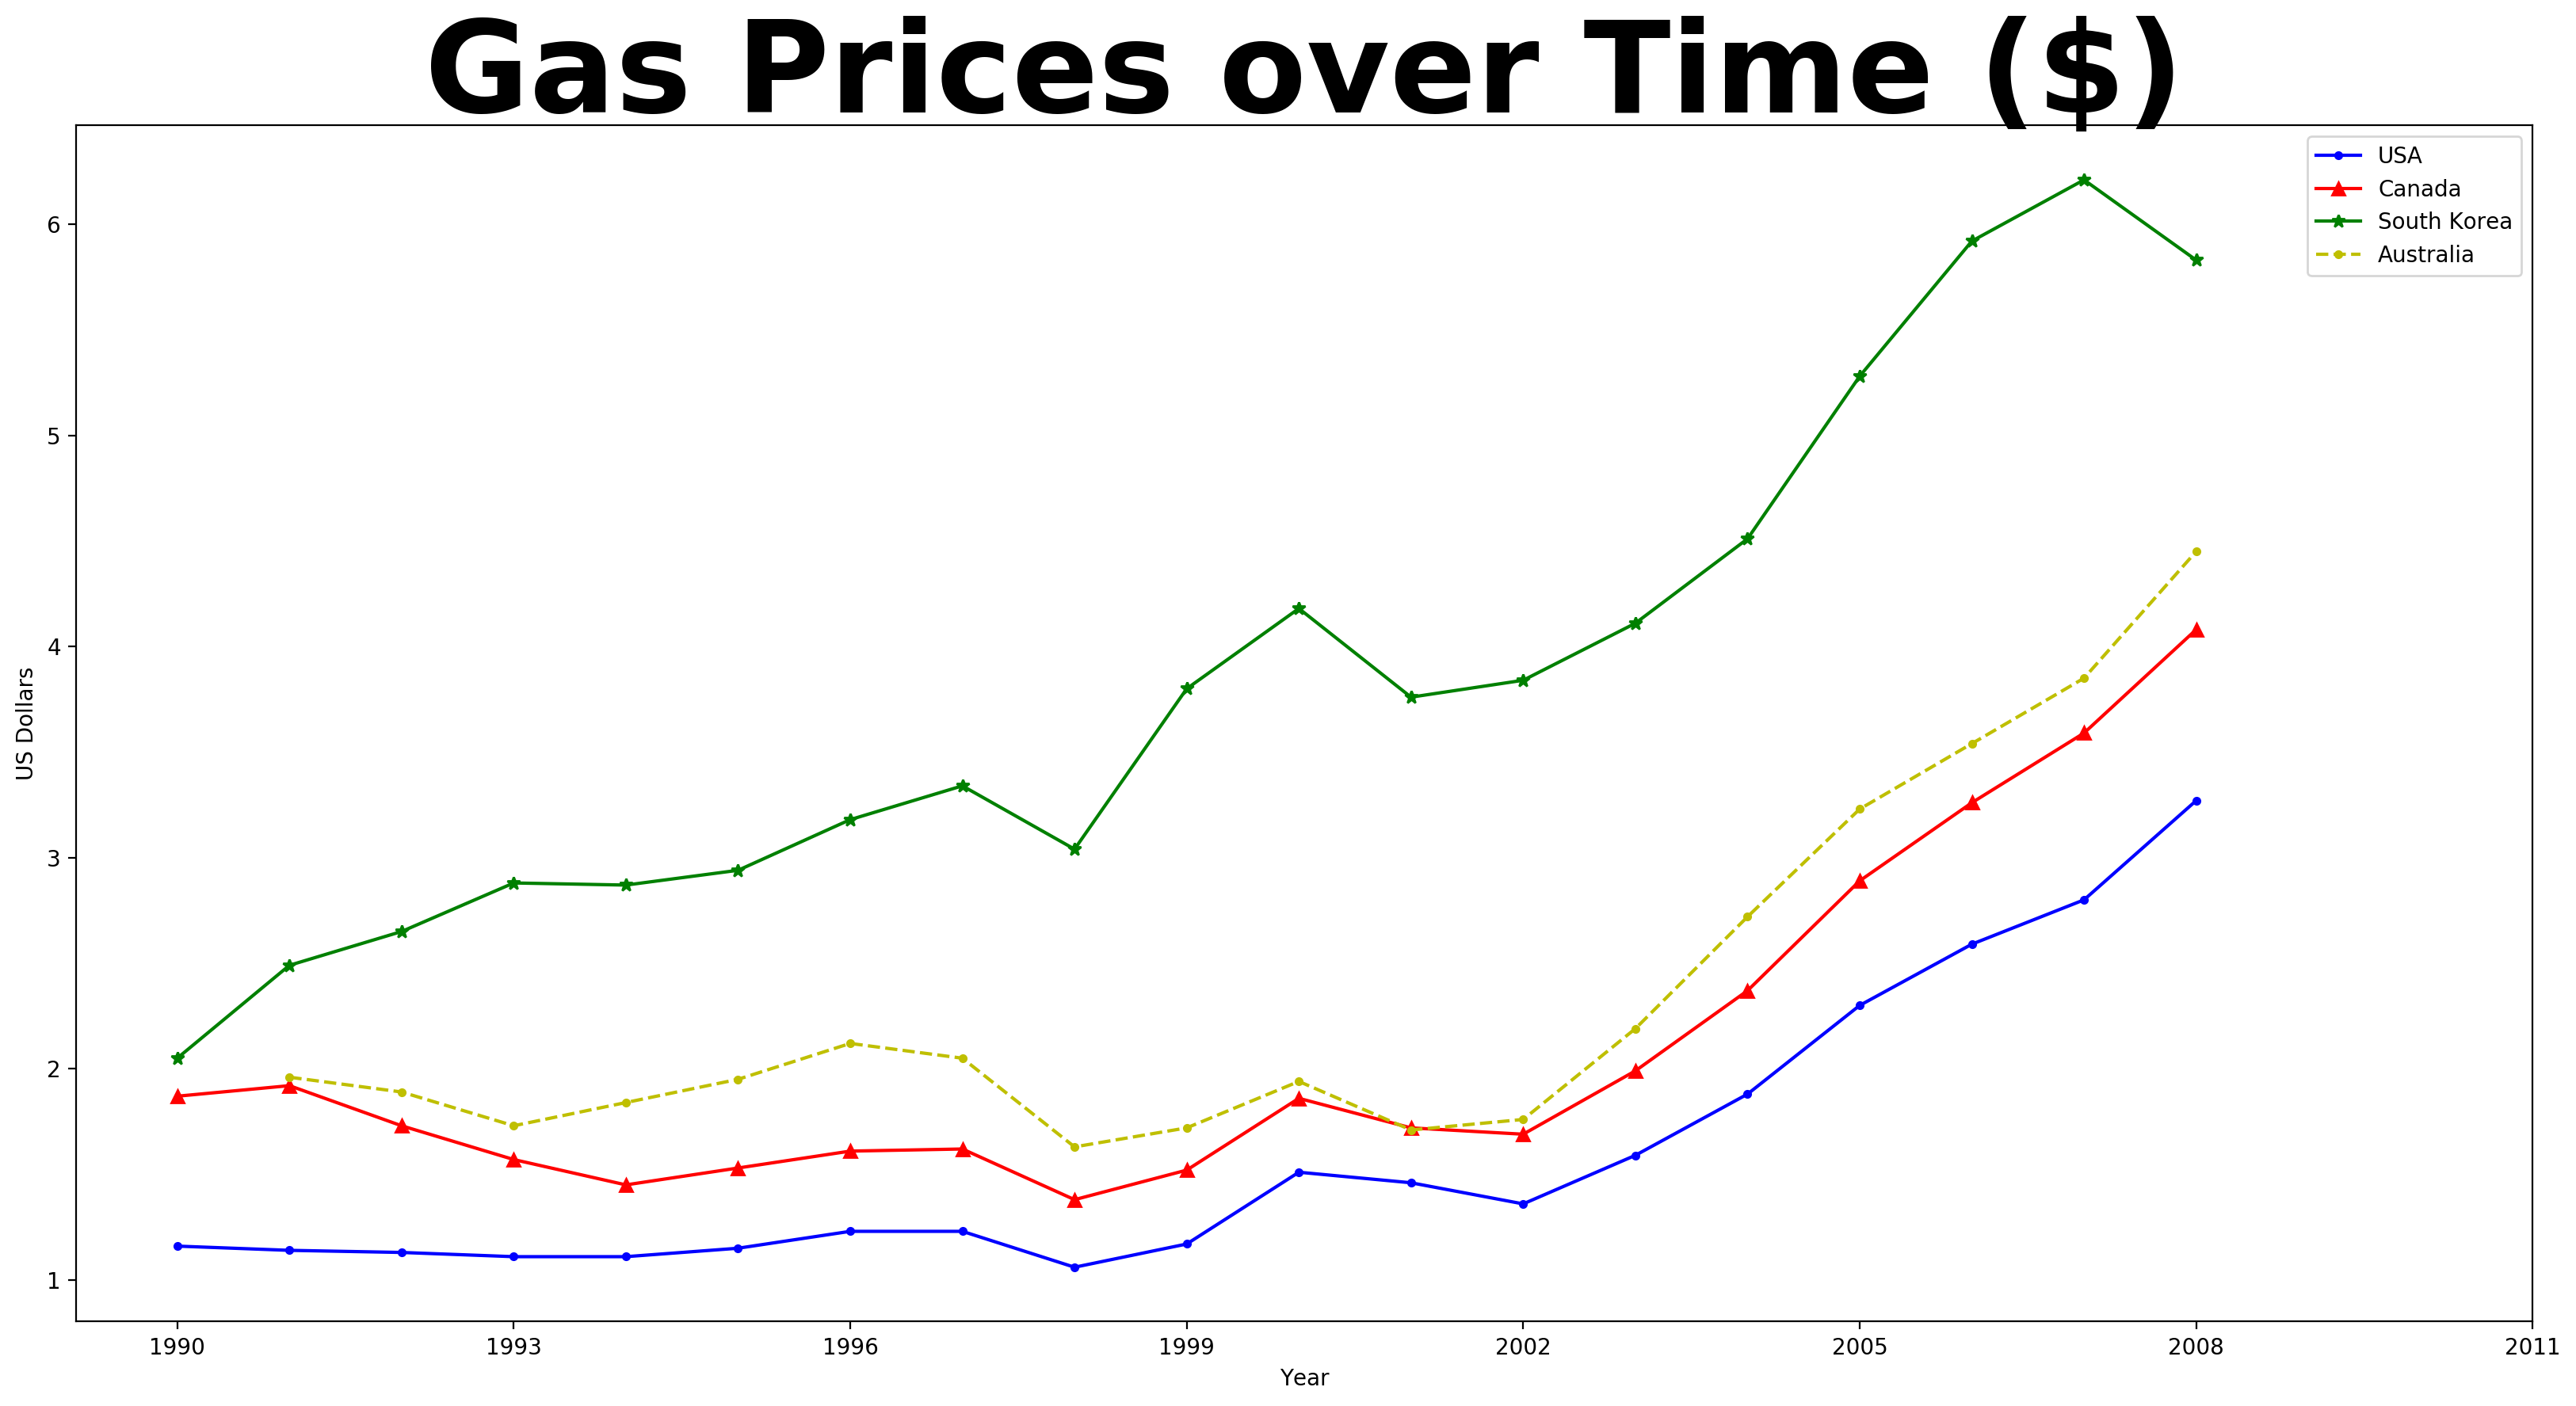

In [43]:
gas = pd.read_csv('gas_prices.csv')

plt.figure(figsize=(20,10), dpi = 200)
plt.title('Gas Prices over Time ($)', fontdict={'fontweight':'bold', 'fontsize':58})

plt.plot(gas.Year, gas.USA, 'b.-')
plt.plot(gas.Year, gas.Canada, 'r^-')
plt.plot(gas.Year, gas['South Korea'], 'g*-')
plt.plot(gas.Year, gas.Australia, 'y.--')

# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']

# for country in countries_to_look_at:
#     if country != 'Year':
#         plt.plot(gas.Year, gas[country], marker = '.')


plt.xticks(gas.Year[::3].tolist()+[2011]) # every three years

plt.xlabel('Year')
plt.ylabel('US Dollars')

plt.legend()

plt.savefig('Gas_price_figure.png', dpi=200)

plt.show()

### Load Fifa Data

In [44]:
fifa = pd.read_csv('fifa_data.csv')

fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### Histograms

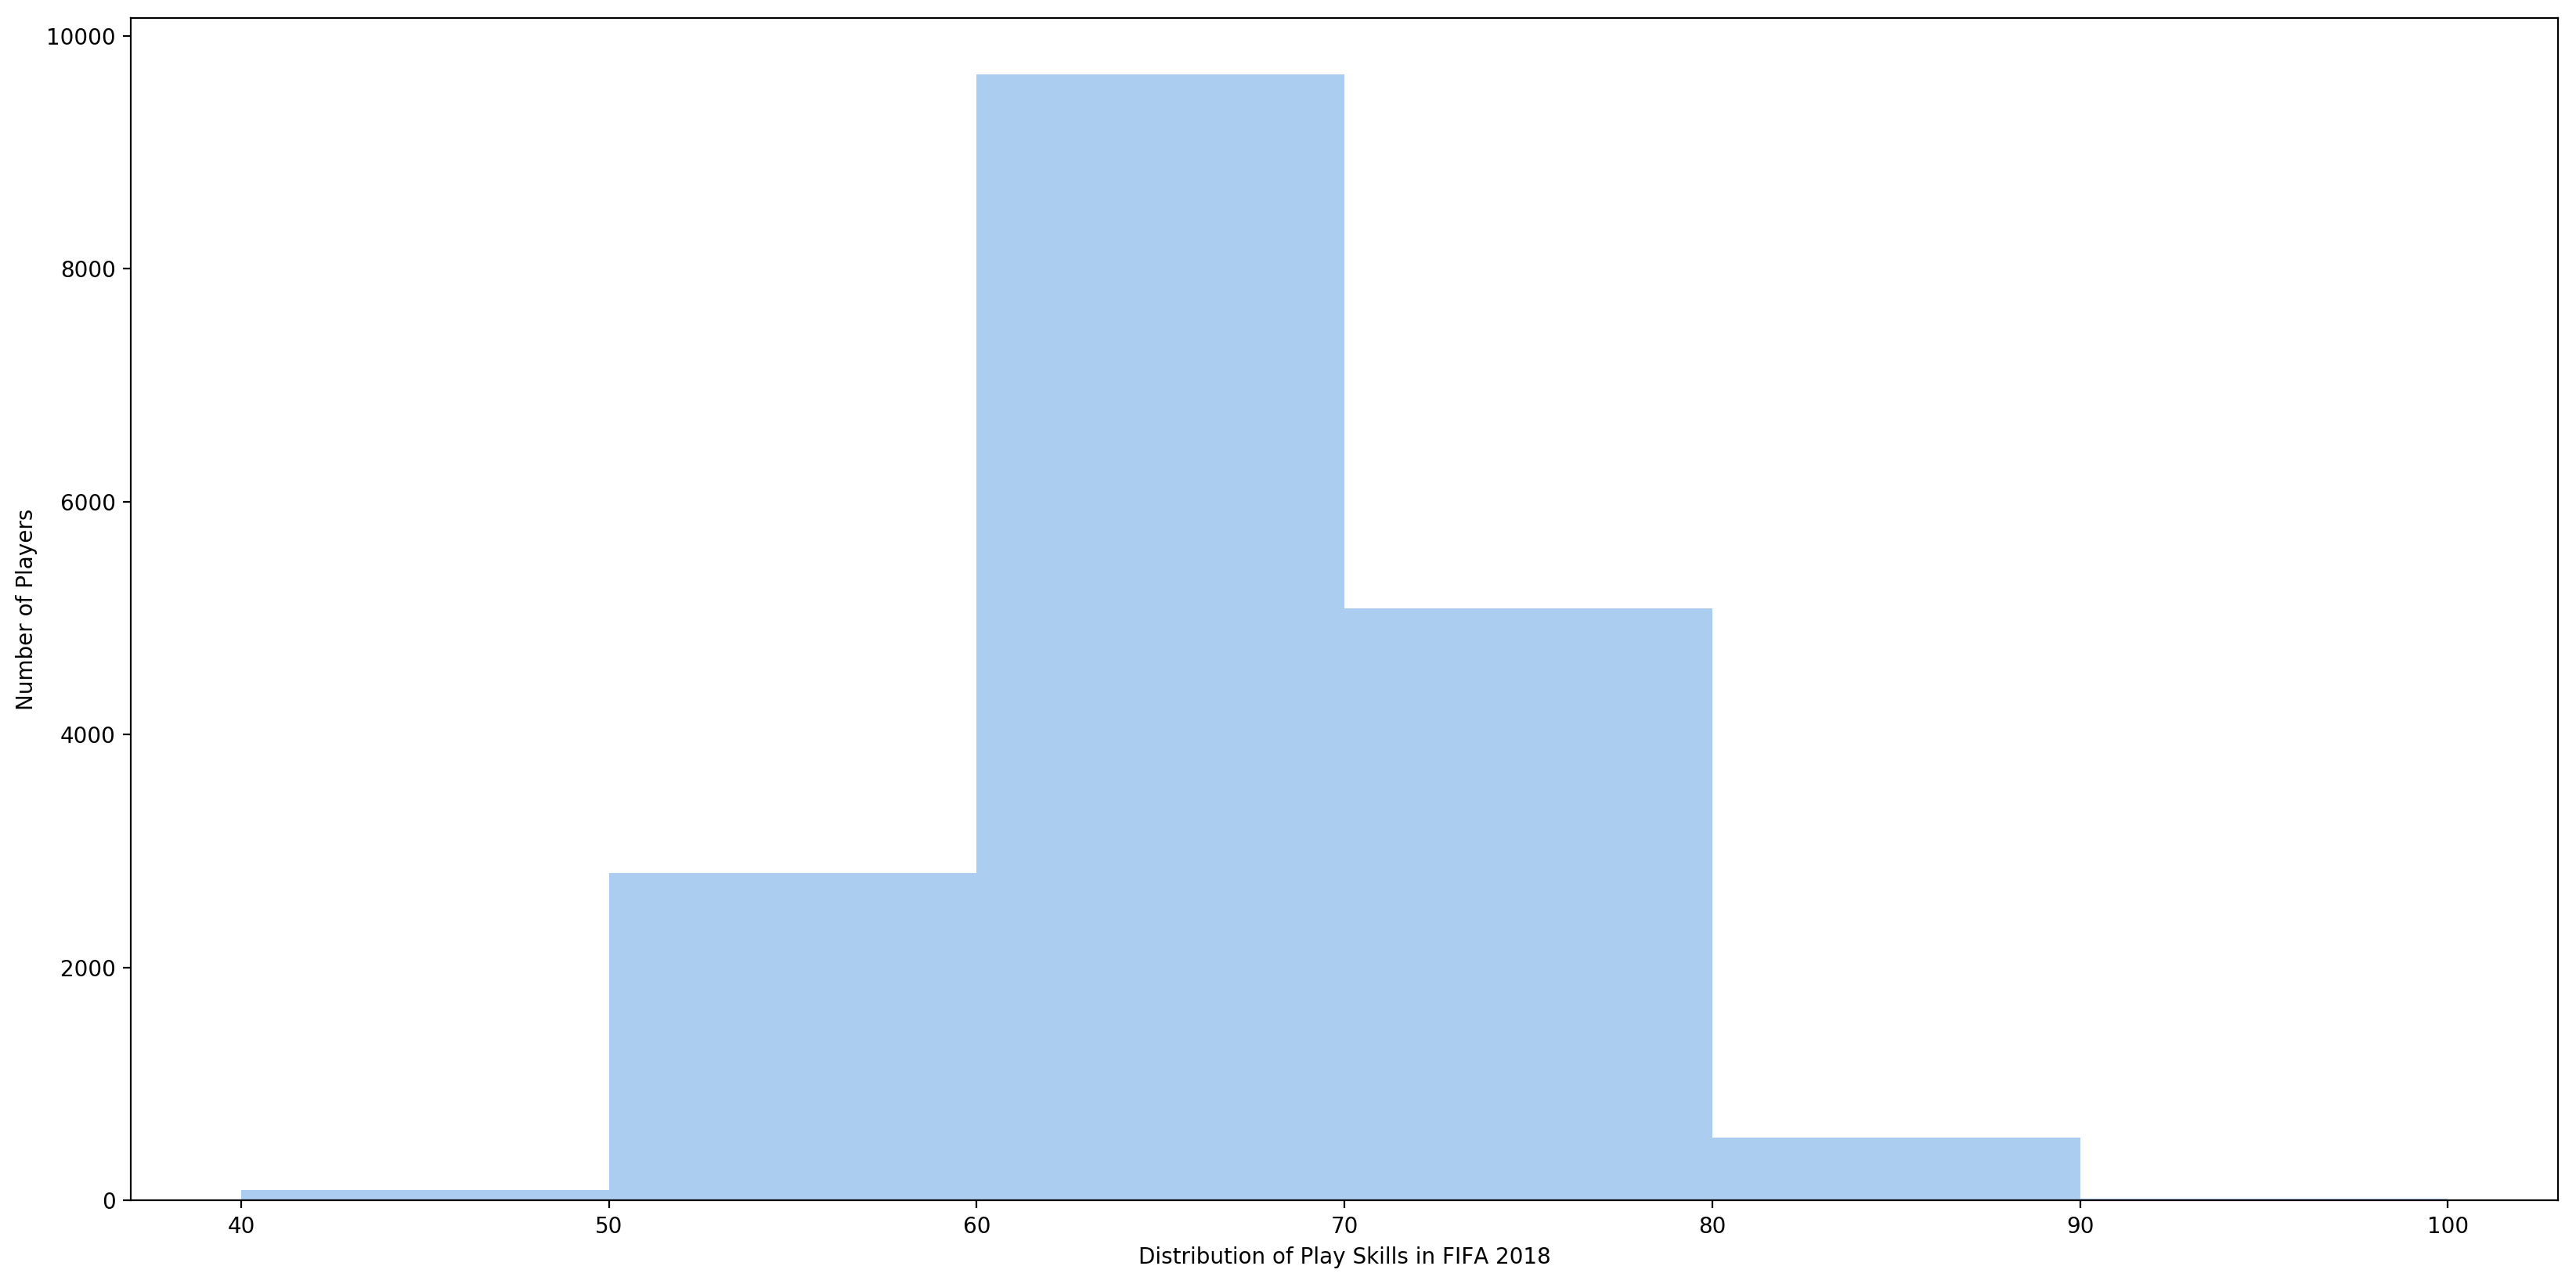

In [54]:
bins = [40,50,60,70,80,90,100]

plt.figure(figsize=(20,10), dpi=200)

plt.hist(fifa.Overall, bins=bins, color='#abcdef')

plt.xticks(bins)

plt.ylabel('Number of Players')
plt.xlabel('Distribution of Play Skills in FIFA 2018')

plt.yticks()

plt.show()

### Pie Charts #1

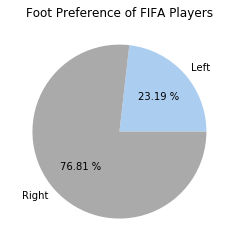

In [77]:
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

labels = ['Left', 'Right']
colors = ['#abcdef', '#aaaaaa']
plt.pie([left, right], labels = labels, colors = colors, autopct='%.2f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

### Pie Charts #2

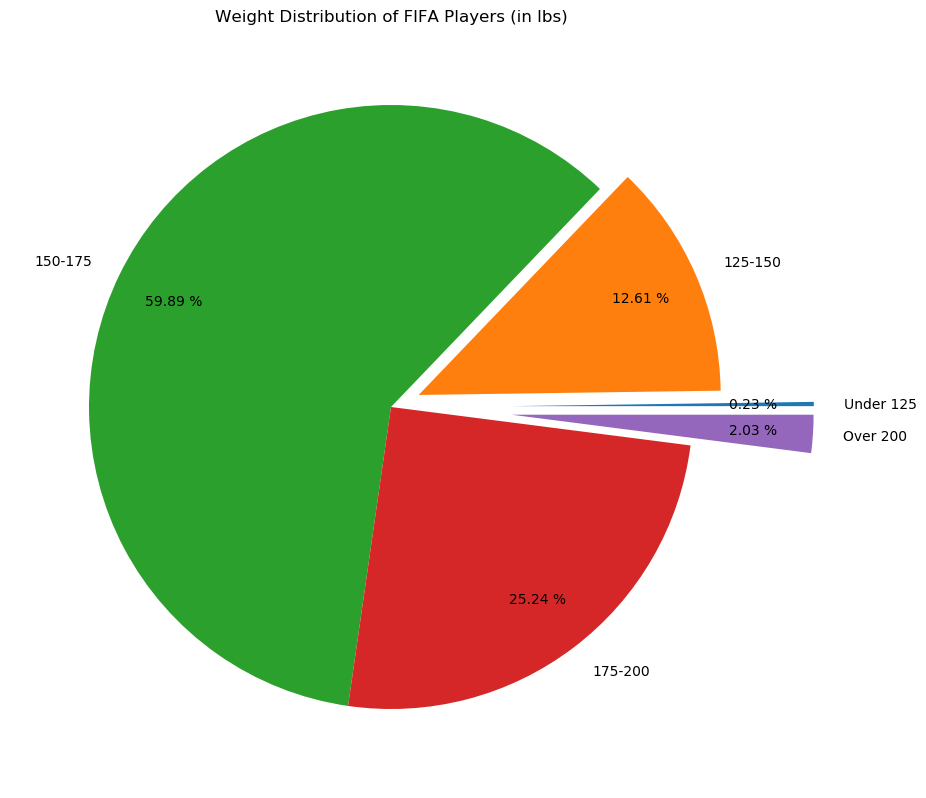

In [95]:
plt.figure(figsize=(20,10), dpi = 100)

fifa.Weight = [int(x.strip('lbs')) if type(x) == str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa.loc[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa.loc[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa.loc[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa.loc[fifa.Weight >= 200].count()[0]

weights = [light, light_medium, medium, medium_heavy, heavy]
labels = ['Under 125', '125-150', '150-175', '175-200', 'Over 200']
explode = (.4, .1, 0, 0, .4)

plt.title('Weight Distribution of FIFA Players (in lbs)')

plt.pie(weights, labels = labels, autopct='%.2f %%', pctdistance=0.8, explode = explode)

plt.show()

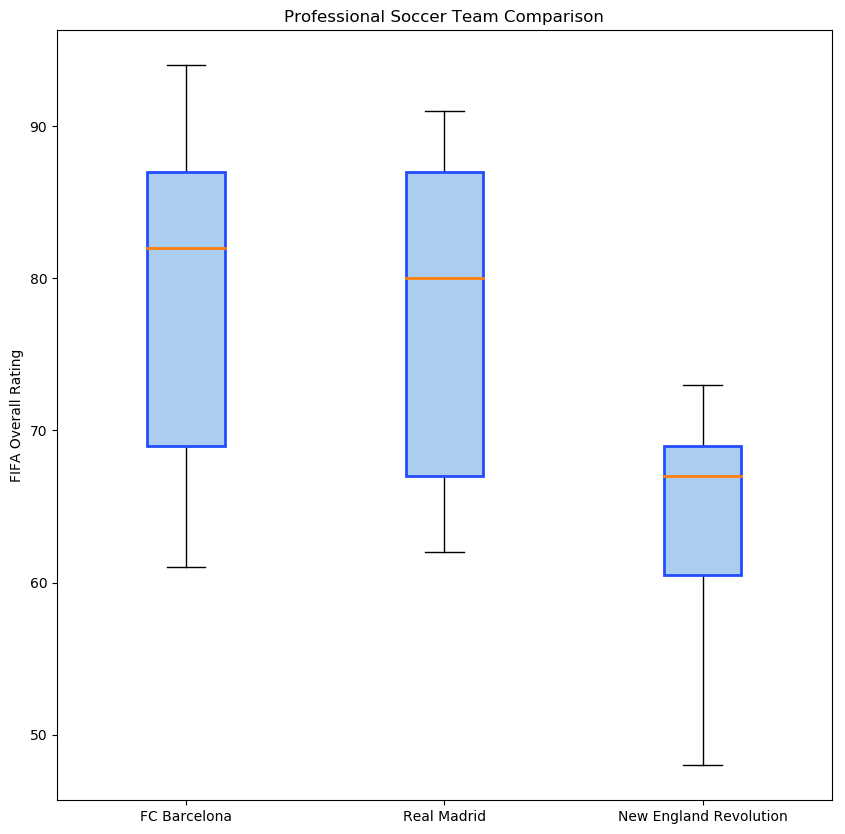

In [114]:
plt.style.use('default')

plt.figure(figsize=(10,10))

barcelona = fifa.loc[fifa.Club == 'FC Barcelona']['Overall']
madrid = fifa.loc[fifa.Club == 'Real Madrid']['Overall']
revs = fifa.loc[fifa.Club == 'New England Revolution']['Overall']



labels = ['FC Barcelona', 'Real Madrid', 'New England Revolution']

boxes = plt.boxplot([barcelona, madrid, revs], labels = labels, patch_artist = True, medianprops={'linewidth':2})


for box in boxes['boxes']:
    # set the edge color
    box.set(color='#234dfe', linewidth=2)
        
    # Chnage Fill Color
    box.set(facecolor='#abcdef')

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

plt.show()